In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ProfitAndLossData/BarsPower_returns.csv')
#data = data.transpose()
data

,retuns
0,62.03
1,63.03
2,64.03
3,65.03
4,66.03
...,...
152,658.57
153,896.10
154,1551.22
155,-396.42


In [8]:
def MonteCarloSimulation(df, initial_cash, num_simulations, num_periods):
    returns = df['retuns'].values
    num_returns = len(returns)
    simulations = np.zeros((num_simulations, num_periods))

    #set initial cash for all simulations
    simulations[:, 0] = initial_cash

    for sim in range(num_simulations):
        #define a fixed initial cash for all the simulations
        current_cash = initial_cash
        for period in range(num_periods):
            #select a random sample from the historical returns without repeating the same sample
            random_sample = np.random.choice(returns, replace=False)
            if current_cash <= 0:
                simulations[sim, period] = 0
            else:
                current_cash += random_sample
                simulations[sim, period] = current_cash

    return simulations      
        

In [9]:
# Parameters
initial_cash = 1000
num_simulations = 100000
num_periods = len(data)


In [10]:
#Run simulations
all_simulations = MonteCarloSimulation(data, initial_cash, num_simulations, num_periods)
all_simulations

array([[ 1023.52,  1091.55,   547.39, ..., 18135.39, 18125.36, 18168.73],
       [  983.15,   562.78,   424.39, ...,     0.  ,     0.  ,     0.  ],
       [ 1587.78,  1564.11,  1680.56, ..., 21094.18, 21037.43, 20641.01],
       ...,
       [ 1063.03,  1157.12,   612.96, ..., 16661.36, 16675.37, 16679.02],
       [  699.82,   755.01,   871.46, ..., 12653.34, 12648.82, 12633.7 ],
       [ 1108.93,   699.16,   720.38, ..., 15705.43, 15543.48, 15573.02]])

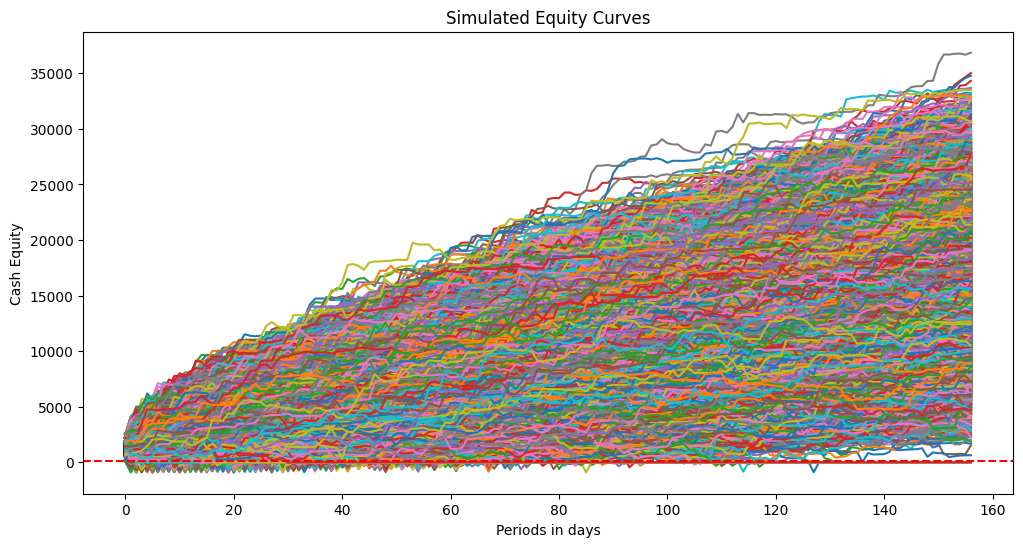

In [14]:
#Plot results
plt.figure(figsize=(12, 6))

for simulation in range(num_simulations):
    plt.plot(all_simulations[simulation])

#plt.axhline(y=100, color='r', linestyle='--')
plt.xlabel('Periods in days')
plt.ylabel('Cash Equity')
plt.title('Simulated Equity Curves')
plt.show()

In [13]:
#Calculate metrics
last_values = all_simulations[:, -1]
positive_results = len(last_values[last_values > initial_cash])
negative_results = len(last_values[last_values <= initial_cash])
zero_results = len(last_values[last_values <= 0])
risk_of_loss = negative_results / len(last_values)
risk_of_ruin = zero_results / len(last_values)

print(f"Number of POSITIVE results: {positive_results}")
print(f"Number of NEGATIVE results: {negative_results}")
print(f"Total Loss: {zero_results}")
print(f"Probability of losing: {risk_of_loss*100}%")
print(f"Probability of ruin: {risk_of_ruin*100}%")

Number of POSITIVE results: 89479
Number of NEGATIVE results: 10521
Total Loss: 10520
Probability of losing: 10.520999999999999%
Probability of ruin: 10.52%
